# One Gaussian curve alignment

This notebook showcases how `msalign` performs when dealing with single curve in the signal. 
The algorithm performs well when dealing with *clean* and *noisy* data, correctly aligning
each signal. 

In [1]:
import numpy as np
from scipy.signal.windows import gaussian
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from msalign import Aligner

plt.style.use('ggplot')

# Utility functions
First, let's make a couple of functions that will generate data for us, as well as, show the results

In [2]:
def simple_one_gaussian_data(shifts, n_signals=5, n_points=100, noise=0):
    """Generate single-Gaussian signal that was shifted along the horizontal axis"""
    # generate x-axis
    x = np.arange(n_points)
    
    # generate Gaussian signal
    _gaussian = gaussian(n_points, std=4) + np.random.normal(0, noise, n_points)
    
    peak = [_gaussian.argmax()]
    
    # pre-allocate array
    array = np.zeros((n_signals, n_points))
    for i in range(n_signals):
        array[i] = shift(_gaussian, shifts[i]) + np.random.normal(0, noise, n_points)
        
    return x, array, shifts, peak

def overlay_plot(ax, x, array, peak):
    """Generate overlay plot, showing each signal and the alignment peak(s)"""
    for i, y in enumerate(array):
        y = (y / y.max()) + (i * 0.2)
        ax.plot(x, y, lw=3)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlabel("Index", fontsize=18)
    ax.set_xlim((x[0], x[-1]))
    ax.vlines(peak, *ax.get_ylim())
    
def shift_plot(ax, shift_in, shift_out):
    """Generate plot displaying the original shifts (before alignment) and corrected shifts (after alignment)"""
    ax.plot(shift_in, label="True shift", lw=3)
    ax.plot(shift_out, label="Computed shift", lw=3)
    ax.legend()
    
def difference_plot(ax, shift_in, shift_out):
    """Generate plot displaying the misalignment for each signal"""
    ax.plot(shift_out.flatten() - shift_in.flatten(), label="Difference", lw=3)
    ax.legend()
    
def align_and_plot(x, array, shifts_in, peak):
    """Align signals and plot the results"""
    # instantiate aligner object
    aligner = Aligner(
        x, 
        array, 
        peak, 
        return_shifts=True,
        align_by_index=True,
        only_shift=True,
        method="pchip"
    )

    # align and collect data
    aligner.run()
    aligned_array, shifts_out = aligner.apply(return_shifts=True)

    # display before and after shifting
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    overlay_plot(ax[0, 0], x, array, peak)
    overlay_plot(ax[1, 0], x, aligned_array, peak)
    shift_plot(ax[0, 1], shifts_in, shifts_out)
    difference_plot(ax[1, 1], shifts_in, shifts_out)

# Alignment of array with one *clean* Gaussian

Let's realign an array of single Gaussian signals back to the original position. Here, we have 10 signals, each was shifted by one bin to the right. We will be aligning along the horizontal dimension using single peak (original position, or the apex of the first curve).

After the alignment, we can also plot the shift correction determined by the `msalign` algorithm.

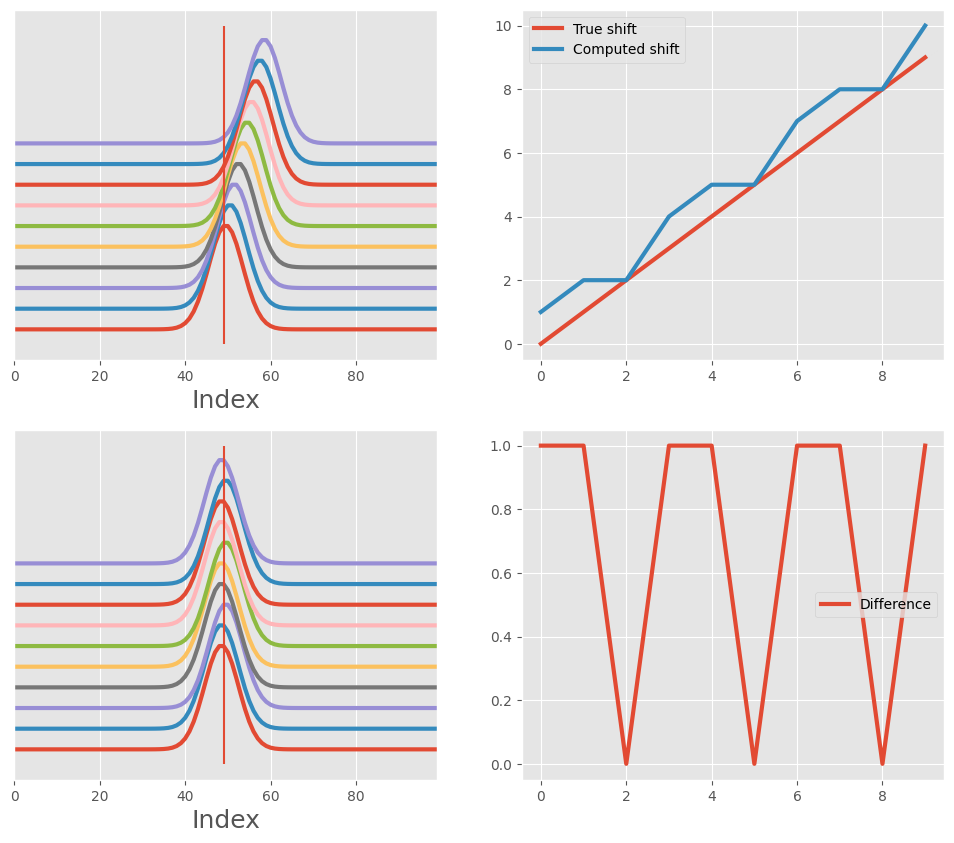

In [3]:
# generate artificial shift (simple offset of by for each signal)
n_signals = 10
n_points = 100
noise = 0
shifts_in = np.arange(0, n_signals)

# generate data
x, array, shifts_in, peak = simple_one_gaussian_data(shifts_in, n_signals, n_points, noise)

# align and plot
align_and_plot(x, array, shifts_in, peak)

# Now with a little bit of noise

We use the same single Gaussian but introduce a bit of noise.

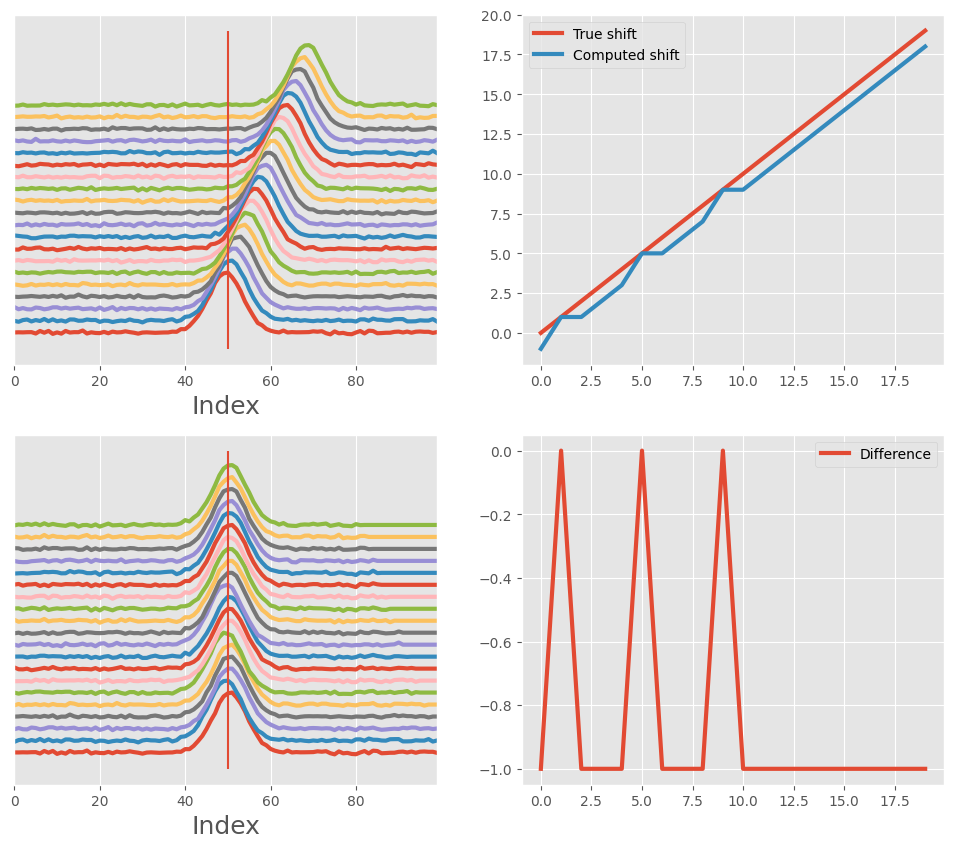

In [4]:
# generate artificial shift (simple offset of by for each signal)
n_signals = 20
n_points = 100
noise = 1e-2
shifts_in = np.arange(0, n_signals)

# generate data
x, array, shifts_in, peak = simple_one_gaussian_data(shifts_in, n_signals, n_points, noise)

# align and plot
align_and_plot(x, array, shifts_in, peak)

# And then a lot of noise

Same as above, but now the noise is substantially higher, making the alignment a little bit more difficult.

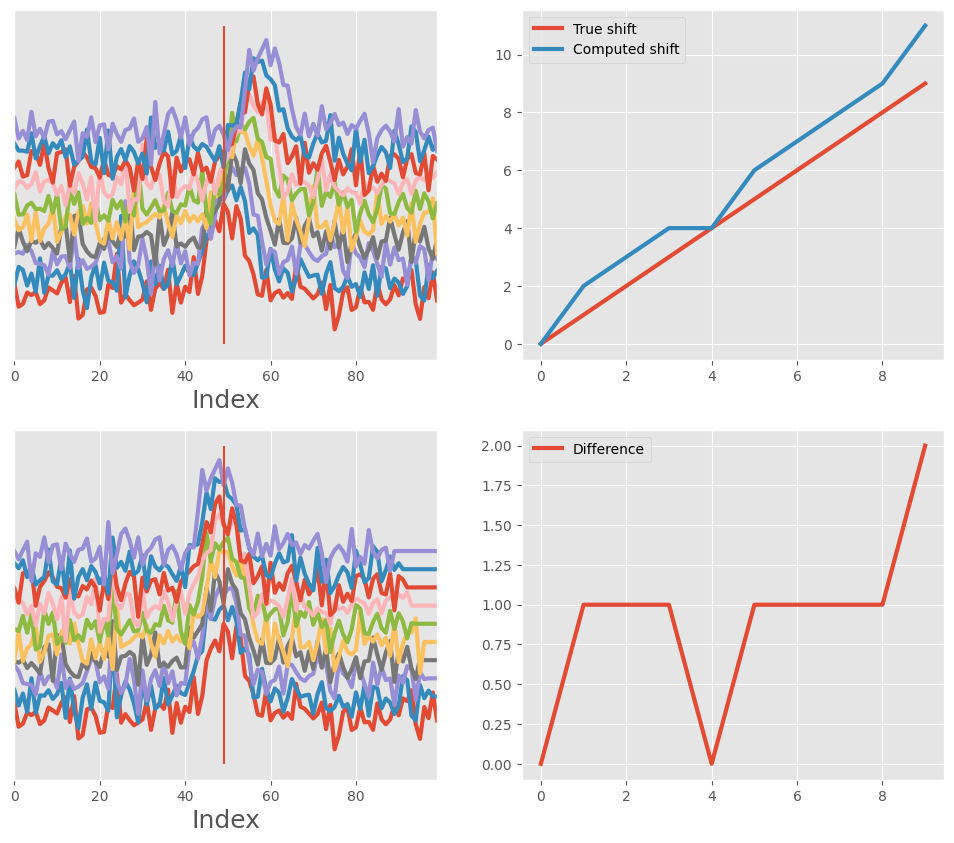

In [5]:
# generate artificial shift (simple offset of by for each signal)
n_signals = 10
n_points = 100
noise = 1e-1
shifts_in = np.arange(0, n_signals)

# generate data
x, array, shifts_in, peak = simple_one_gaussian_data(shifts_in, n_signals, n_points, noise)

# align and plot
align_and_plot(x, array, shifts_in, peak)

# Alignment of array with one *clean* Gaussian - random shift

We are still using single Gaussian curve, but now the shift can be either positive or negative, so a little bit less predictable. We use the random number generator to control the amount of shift. Despite quite substantial shift, the alignment is successful.

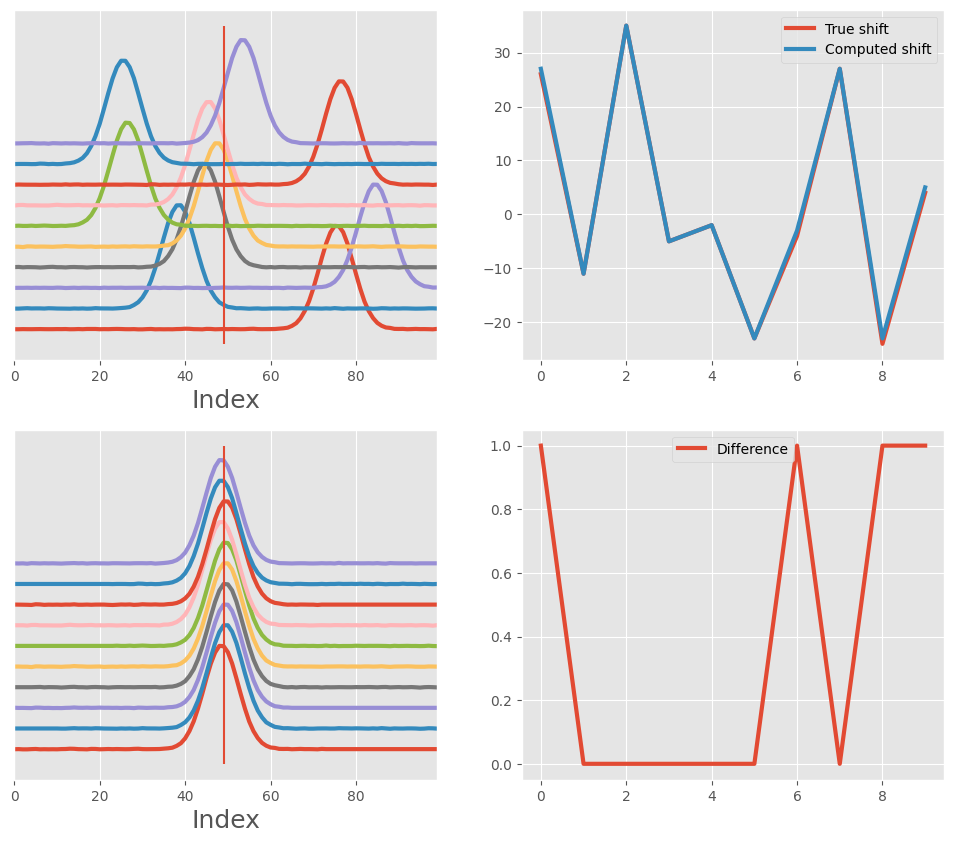

In [6]:
# generate artificial shift (simple offset of by for each signal)
n_signals = 10
n_points = 100
noise = 1e-3
np.random.seed(42)
shifts_in = np.random.randint(-25, 40, n_signals)

# generate data
x, array, shifts_in, peak = simple_one_gaussian_data(shifts_in, n_signals, n_points, noise)

# align and plot
align_and_plot(x, array, shifts_in, peak)